<a href="https://colab.research.google.com/github/Matcraft94/curso_DL/blob/main/Interaccion_tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !sudo apt install tesseract-ocr

In [3]:
# !pip install pytesseract

In [4]:
import pytesseract
from PIL import Image

In [5]:
# img = Image.open('/content/CI.jpg')

In [6]:
# img = Image.open('/content/drive/MyDrive/OCRs/data/CI.png')

In [7]:
# img

In [8]:
# print(pytesseract.image_to_string(img))

In [9]:
# print(pytesseract.image_to_boxes(img))

In [10]:
# print(pytesseract.image_to_data(img))

In [11]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [12]:
img = cv2.imread('/content/drive/MyDrive/OCRs/data/CI.png')

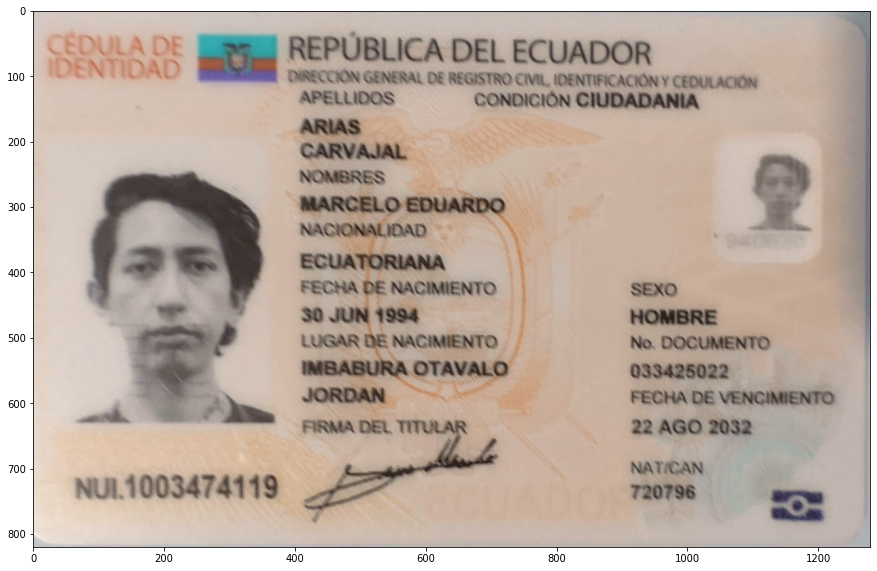

In [88]:
plt.figure(figsize=(15,30))
plt.imshow(img)
plt.show()

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

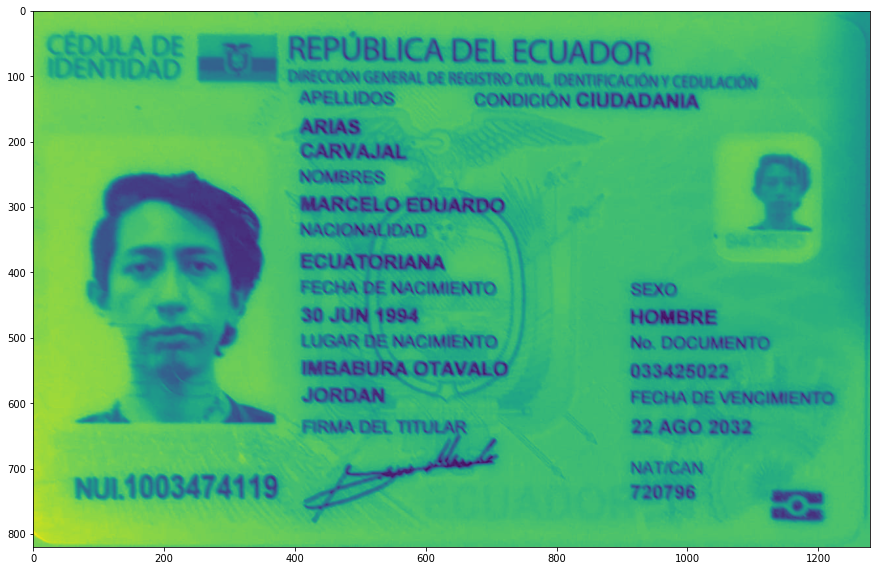

In [74]:
plt.figure(figsize=(15,30))
plt.imshow(gray)
plt.show()

In [89]:
new_image = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)

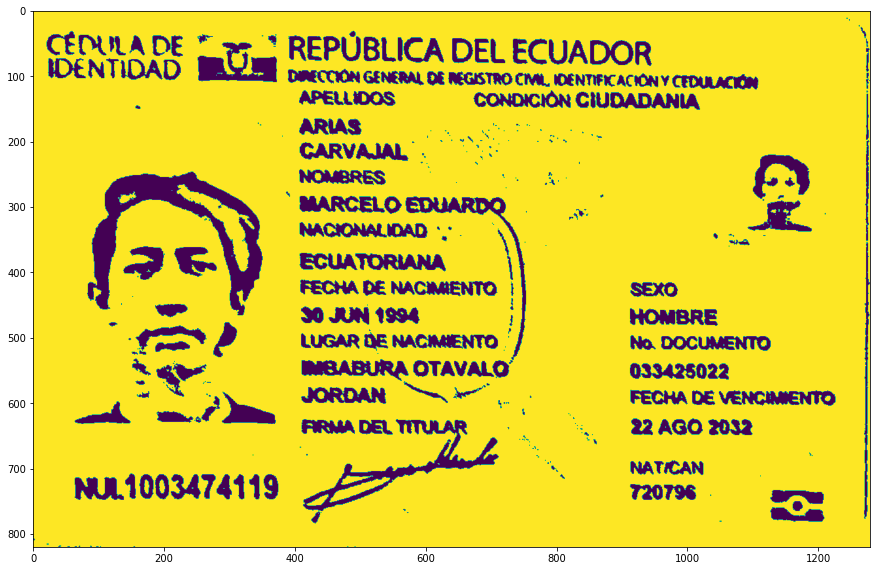

In [90]:
plt.figure(figsize=(15,30))
plt.imshow(new_image)
plt.show()

In [77]:
text = pytesseract.image_to_string(new_image, config="--psm 3", nice=1)
print(text)

CEDULA DE
WENTIDAD

a 4

er

 

REPUBLICA DEL ECUADOR

DIRECTION GENERAL DE REGISTRO CIVIL IDENTIFICACION Y CEDULACION
PURE Oy CIUDADANIA
PN ;
CARVAJAL .
Des a
MARCELO s g
Drea -<
ECUATORIANA
Pea ee a coal SEXO
30 JUN 1994 j ee
LUGAR DE NACIMIENTO No. DOCUMENTO
WEABURA OTAVALO’ 033425022

~—Sn
* UL
NUL1003474119 2 relay ao,



In [87]:
boxes = pytesseract.image_to_boxes(new_image).split('\n')
for i in range(10):
  print(boxes[i])

C 21 751 40 788 0
E 40 751 64 788 0
D 70 751 91 782 0
U 91 751 112 782 0
L 117 751 140 780 0
A 148 751 165 781 0
D 183 750 198 781 0
E 212 749 229 781 0
W 23 716 49 746 0
E 49 716 74 746 0


In [79]:
# for box in boxes:
#   print(box.split(' '))

In [80]:
box = boxes[0].split(' ')
box = box[1:5]

In [81]:
box

['21', '751', '40', '788']

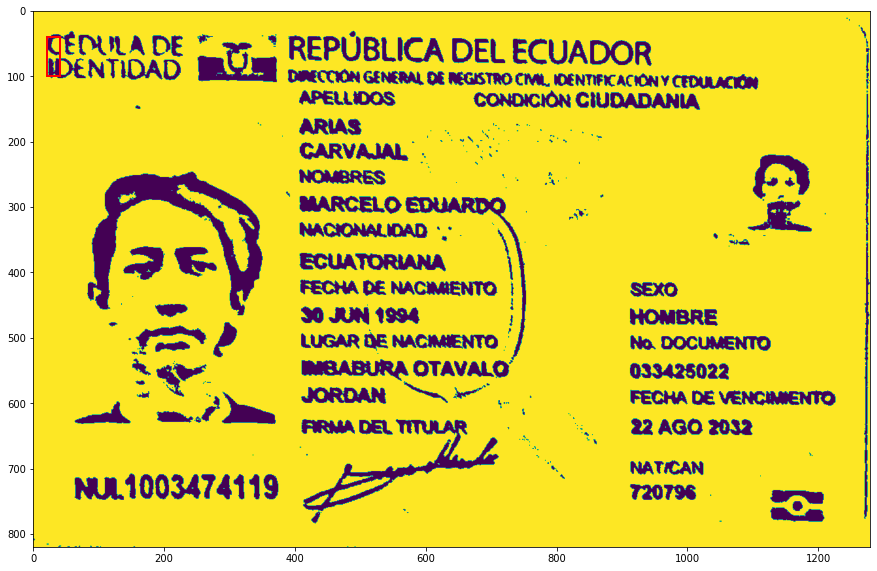

In [92]:
fig, ax = plt.subplots(figsize=(15,30))
ax.imshow(new_image)
count = 0
for box in boxes:
  box = box.split(' ')
  box = box[1:5]
  rect = patches.Rectangle((int(box[0]), int(box[2])), 20, 60, linewidth=2, edgecolor='r', facecolor='none')
  ax.add_patch(rect)
  count += 1
  if count < 5:
    break

